### 1. Importing Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [3]:
path = r'C:\Users\dmksk\OneDrive\Desktop\CF\Macine Learning with Python\Ex 2.1\Data'

In [5]:
# Load the CSV file with the correct column names
pleasant = pd.read_csv(os.path.join(path, 'Pleasant_Weather.csv'), header=0, index_col= False)

# Display the first few rows to confirm
pleasant.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
pleasant.shape

(22950, 16)

In [7]:
# Load the CSV file with the correct column names
unscaled = pd.read_csv(os.path.join(path, 'Dataset_Weather.csv'), header=0, index_col= False)

# Display the first few rows to confirm
unscaled.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


### 2. Data Wrangling and Scaling
- limiting dataset to 1993s

In [8]:
#Reducing dataset to 1993
dfdecade = unscaled[unscaled['DATE'].astype(str).str.contains('1993')] #<-----INSERT YEAR HERE
dfdecade

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
12054,19930101,1,3,1.5,0.88,1.0343,0.52,0.00,0,3.3,...,7,0.89,1.0245,0.12,0.07,0,0.0,8.4,5.8,10.9
12055,19930102,1,5,2.1,0.85,1.0345,0.26,0.00,0,0.0,...,7,0.87,1.0235,0.24,0.18,0,0.0,10.2,9.9,10.6
12056,19930103,1,3,2.2,0.80,1.0320,0.52,0.00,0,2.7,...,7,0.84,1.0122,0.13,2.85,0,0.0,9.9,8.2,11.6
12057,19930104,1,3,1.7,0.80,1.0327,0.51,0.00,0,1.9,...,6,0.83,1.0142,0.17,2.36,0,0.0,9.6,6.5,12.7
12058,19930105,1,3,3.8,0.73,1.0378,0.61,0.00,0,5.7,...,7,0.84,1.0147,0.14,0.34,0,0.0,8.3,6.8,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12414,19931227,12,8,2.1,0.86,1.0153,0.18,0.05,1,0.0,...,7,0.87,1.0092,0.18,2.40,0,0.2,6.6,2.1,11.0
12415,19931228,12,8,2.1,0.86,1.0169,0.22,0.00,0,0.0,...,7,0.84,1.0005,0.14,0.53,0,0.1,6.6,2.1,10.9
12416,19931229,12,8,2.1,0.84,1.0192,0.46,0.19,0,3.2,...,6,0.74,0.9957,0.30,0.19,0,1.9,7.2,5.3,11.2
12417,19931230,12,5,2.1,0.69,1.0202,0.43,0.10,0,1.7,...,7,0.74,0.9962,0.25,0.47,0,1.3,7.0,5.0,9.0


In [9]:
##  exclude non-numeric columns like DATE and MONTH, as they are not useful for clustering.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dfdecade.drop(columns=['DATE', 'MONTH']))


In [10]:
## Convert the scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_data, columns=dfdecade.drop(columns=['DATE', 'MONTH']).columns)

In [11]:
df_scaled.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.255477,-1.556361,1.141412,1.858286,-0.782989,-0.474452,-0.196618,-0.217277,-2.234073,-2.456514,...,0.529462,0.954392,0.774563,-1.160836,-0.427323,0.0,-0.855656,-0.749731,-0.649800,-0.771904
1,-0.349846,-0.126050,0.868639,1.882457,-1.066220,-0.474452,-0.196618,-0.995481,-2.637121,-2.705638,...,0.529462,0.675821,0.688505,-1.012271,-0.286020,0.0,-0.855656,-0.176772,0.501272,-0.864624
2,-1.255477,0.112335,0.414017,1.580315,-0.782989,-0.474452,-0.196618,-0.358769,-2.720511,-2.752349,...,0.529462,0.257964,-0.283942,-1.148455,3.143789,0.0,-0.855656,-0.272265,0.023998,-0.555557
3,-1.255477,-1.079591,0.414017,1.664915,-0.793883,-0.474452,-0.196618,-0.547424,-2.525935,-2.861341,...,-0.029074,0.118679,-0.111827,-1.098934,2.514349,0.0,-0.855656,-0.367758,-0.453276,-0.215584
4,-1.255477,3.926498,-0.222453,2.281286,-0.684948,-0.474452,-0.196618,0.348690,-1.928312,-2.347523,...,0.529462,0.257964,-0.068799,-1.136075,-0.080488,0.0,-0.855656,-0.781562,-0.369051,-0.246491


In [12]:
df_scaled.shape

(365, 168)

## 01. Single Linkage 1993

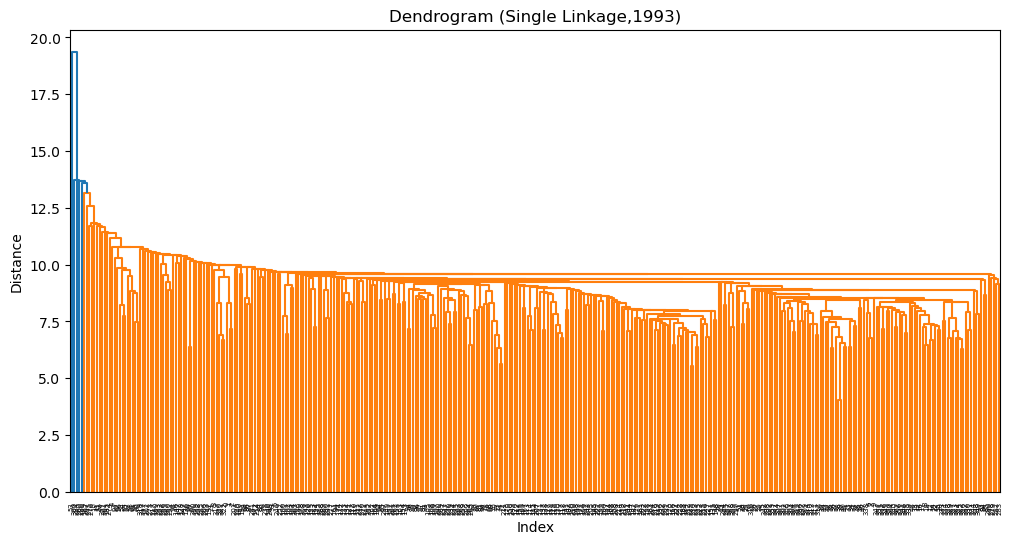

In [43]:
# Perform hierarchical clustering using the 'single' linkage method
distance_single = linkage(df_scaled, method="single")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title("Dendrogram (Single Linkage,1993)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## 02. Complete Linkage 1993

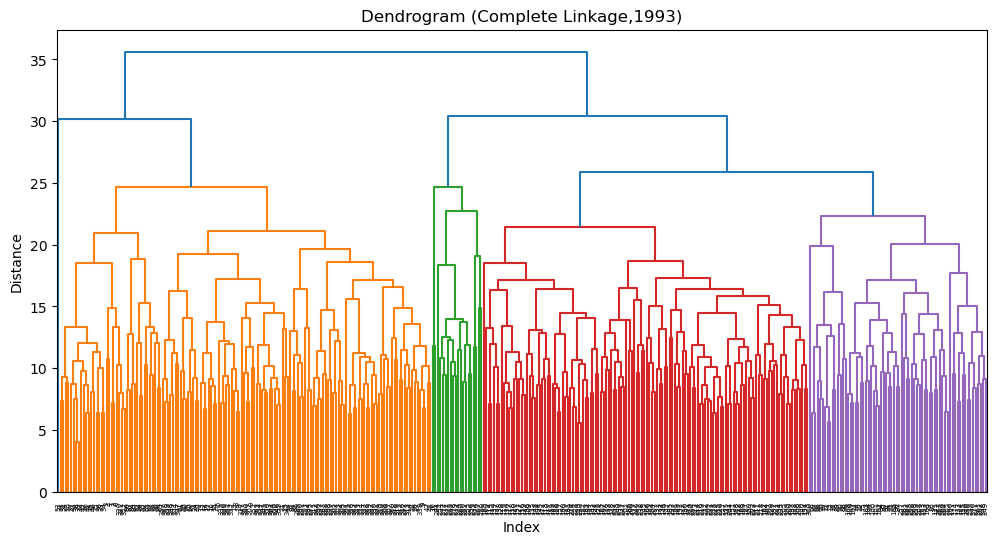

In [44]:
# Perform hierarchical clustering using the 'complete' linkage method
distance_complete = linkage(df_scaled, method="complete")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title("Dendrogram (Complete Linkage,1993)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## 3.Average Linkage 1993

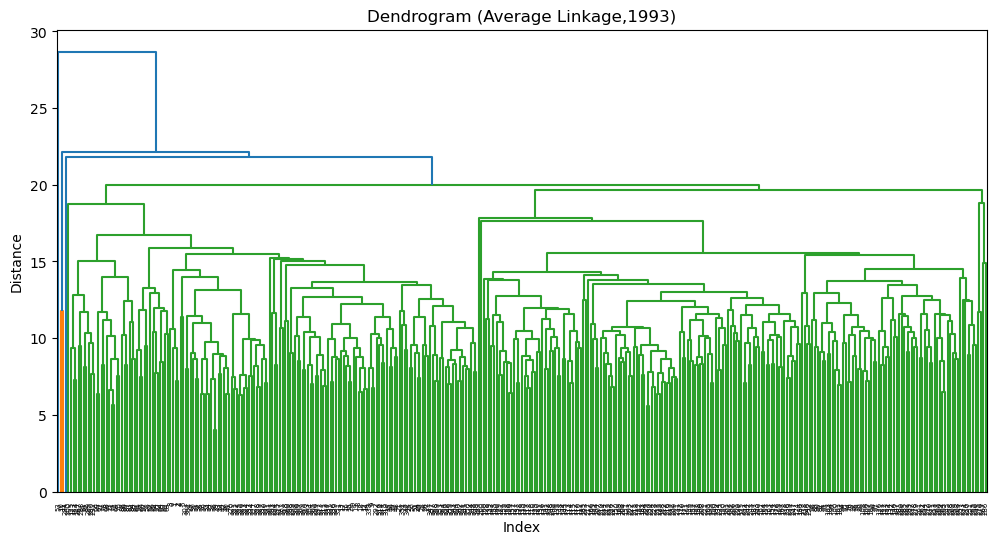

In [45]:
# Perform hierarchical clustering using the 'average' linkage method
distance_average = linkage(df_scaled, method="average")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title("Dendrogram (Average Linkage,1993)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## 4. Ward Linkage 1993

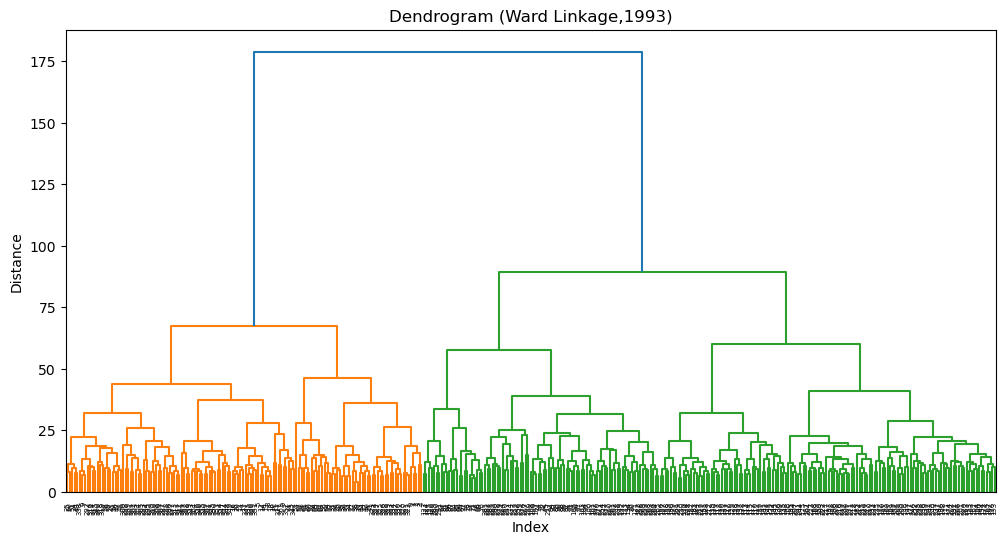

In [46]:
# Perform hierarchical clustering using the 'ward' linkage method
distance_ward = linkage(df_scaled, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title("Dendrogram (Ward Linkage,1993)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


###  Try with 2010 Data, see there is different in paterns. 

In [47]:
# Reducing dataset to 2010
df2010 = unscaled[unscaled['DATE'].astype(str).str.startswith('2010')]  # Filter rows where DATE starts with '2010'
df2010

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,2.3,0.93,0.9965,0.18,0.56,0,0.0,...,1,0.80,1.0121,0.43,0.00,0,6.0,1.7,-1.6,5.0
18264,20100102,1,3,3.0,0.74,1.0193,0.58,0.00,1,5.2,...,1,0.82,1.0196,0.45,0.00,0,6.0,0.8,-4.5,6.2
18265,20100103,1,3,1.7,0.75,1.0226,0.61,0.00,0,6.3,...,4,0.71,1.0196,0.36,0.41,0,1.6,0.5,-4.1,5.1
18266,20100104,1,5,1.0,0.83,1.0169,0.48,0.00,0,3.7,...,2,0.67,1.0219,0.48,0.51,0,6.5,3.7,1.3,3.8
18267,20100105,1,7,1.4,0.78,1.0073,0.53,0.04,0,4.4,...,4,0.78,1.0117,0.45,0.09,0,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18623,20101227,12,7,1.5,0.80,1.0262,0.45,0.00,15,2.0,...,5,0.82,1.0142,0.12,0.41,0,3.4,10.7,7.9,12.1
18624,20101228,12,8,2.5,0.86,1.0226,0.22,0.08,13,0.0,...,5,0.82,1.0142,0.12,0.41,0,3.4,10.7,7.9,11.8
18625,20101229,12,8,1.6,0.97,1.0232,0.20,0.00,12,0.0,...,5,0.82,1.0142,0.21,0.41,0,3.4,10.7,7.9,11.4
18626,20101230,12,8,1.0,1.00,1.0242,0.13,0.00,8,0.0,...,5,0.82,1.0142,0.24,0.41,0,3.4,10.7,7.9,11.7


In [48]:
##  exclude non-numeric columns like DATE and MONTH, as they are not useful for clustering.
scaler = StandardScaler()
scaled_data_2010 = scaler.fit_transform(df2010.drop(columns=['DATE', 'MONTH']))


In [49]:
## Convert the scaled data back to a DataFrame for easier handling
df_scaled_2010 = pd.DataFrame(scaled_data_2010, columns=df2010.drop(columns=['DATE', 'MONTH']).columns)

In [50]:
df_scaled_2010.head()

,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1.008562,0.777128,1.509940,-2.381145,-1.162037,0.681868,-0.360027,-0.933688,-0.877406,-0.872786,...,-2.826720,-0.171783,-0.274248,-0.979632,-0.139324,0.0,0.611279,-2.789164,-2.461020,-1.753796
1,-1.403792,1.717261,-0.140925,0.563135,-0.743904,-0.471125,-0.022212,0.262330,-1.424933,-1.439504,...,-2.826720,0.158222,0.621747,-0.955551,-0.139324,0.0,0.611279,-3.112718,-3.355223,-1.496136
2,-1.403792,-0.028701,-0.054037,0.989281,-0.712544,-0.471125,-0.360027,0.515334,-1.636477,-1.694528,...,-0.659172,-1.656806,0.621747,-1.063915,-0.051988,0.0,-0.951711,-3.220569,-3.231884,-1.732324
3,-0.438850,-0.968834,0.641064,0.253211,-0.848437,-0.471125,-0.360027,-0.082675,-1.848022,-2.020391,...,-2.104204,-2.316816,0.896519,-0.919430,-0.030686,0.0,0.788892,-2.070155,-1.566818,-2.011456
4,0.526092,-0.431615,0.206626,-0.986486,-0.796171,-0.388769,-0.360027,0.078327,-1.736027,-1.850375,...,-0.659172,-0.501789,-0.322035,-0.955551,-0.120153,0.0,0.149486,-2.573461,-2.183509,-1.667909


In [70]:
# Extract the weather station names by splitting the column names at the underscore
stations = set(col.split('_')[0] for col in df_scaled_2010.columns)

# Count the number of unique weather stations
number_of_stations = len(stations)

print(f"Number of weather stations: {number_of_stations}")



Number of weather stations: 18


In [51]:
df_scaled_2010.shape

(365, 168)

## 01. Single Linkage 2010

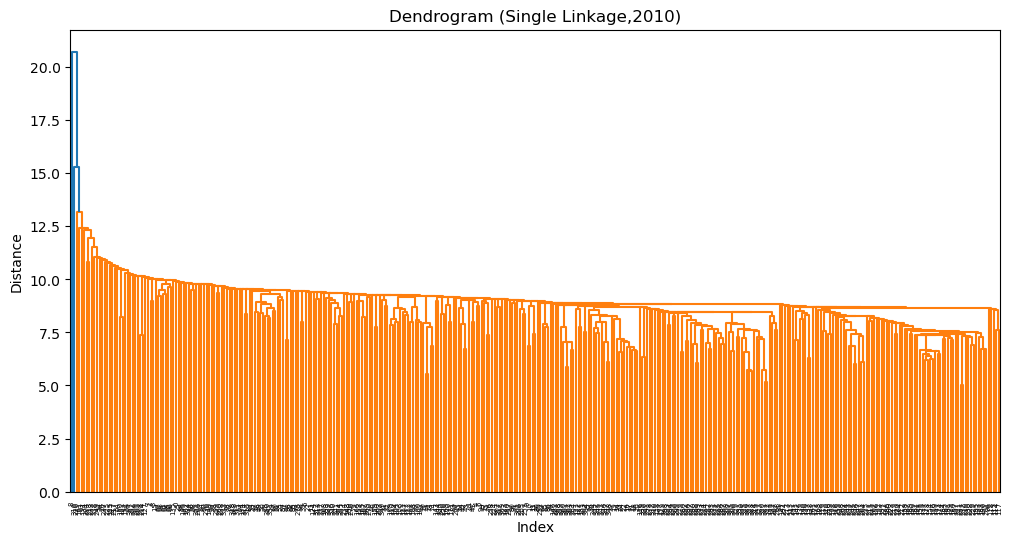

In [52]:
# Perform hierarchical clustering using the 'single' linkage method
distance_single = linkage(df_scaled_2010, method="single")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title("Dendrogram (Single Linkage,2010)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

## 02. Complete Linkage 2010

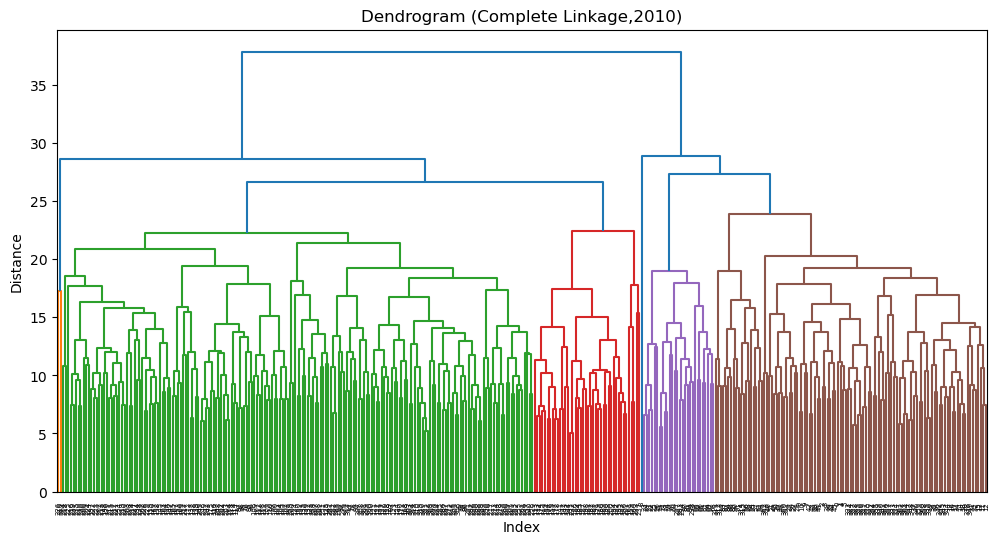

In [53]:
# Perform hierarchical clustering using the 'complete' linkage method
distance_complete = linkage(df_scaled_2010, method="complete")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title("Dendrogram (Complete Linkage,2010)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

## 3.Average Linkage 2010

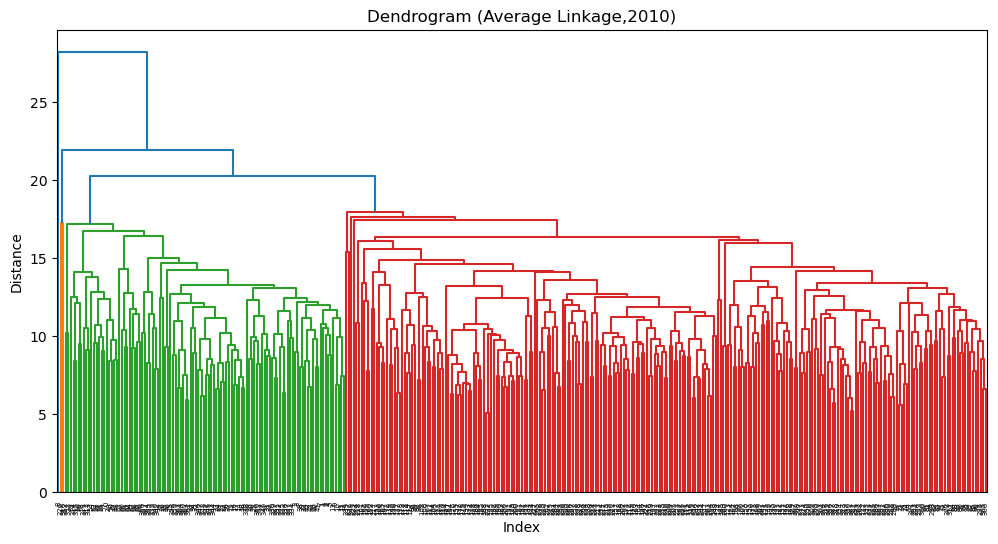

In [54]:
# Perform hierarchical clustering using the 'average' linkage method
distance_average = linkage(df_scaled_2010, method="average")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title("Dendrogram (Average Linkage,2010)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## 4. Ward Linkage 2010

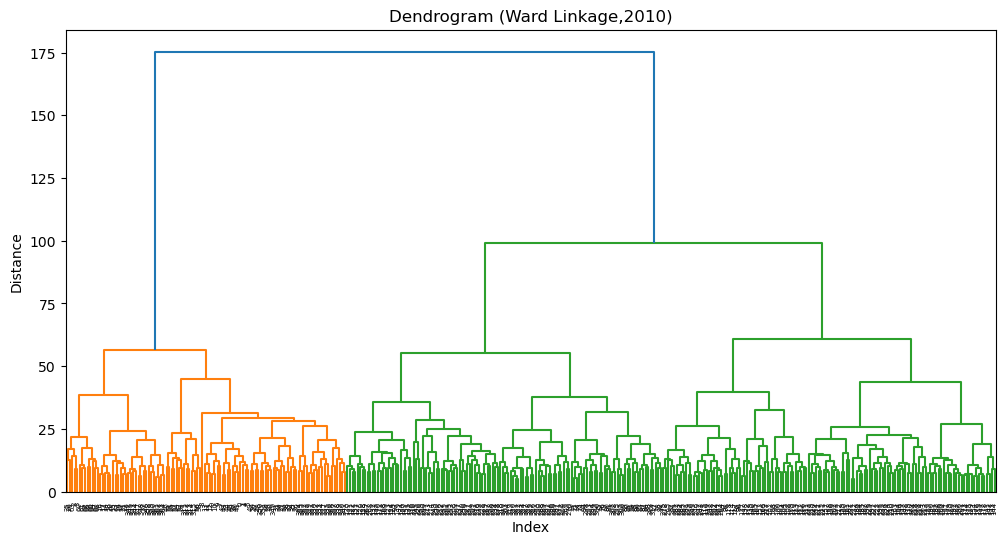

In [55]:
# Perform hierarchical clustering using the 'ward' linkage method
distance_ward = linkage(df_scaled_2010, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title("Dendrogram (Ward Linkage,2010)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [57]:
#Run the PCA model, reducing to 11 (for number of measurements)
pca = PCA(n_components=11)
principalComponents = pca.fit_transform(df_scaled_2010)

In [58]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(principalComponents, columns=['PCA1', 'PCA2','PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11'])

In [62]:
dfPCA.head()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-10.350720,-3.420210,2.694481,-4.907945,-0.615270,-0.117793,-0.380163,0.204613,-3.219977,-1.458297,-1.574393
1,-11.401106,2.143787,1.175547,-1.047558,0.480527,0.150198,-0.519505,-0.065881,-3.694651,0.137323,-0.728764
2,-11.325143,5.163536,-3.273977,0.302211,0.740460,-1.595493,-1.100995,0.380620,-2.164505,0.403377,0.245975
3,-12.031747,3.520175,-3.119572,-1.180872,-0.258580,-3.556305,1.086317,1.379936,-2.632509,0.951803,-1.441656
4,-13.064564,0.325910,-0.179326,-2.587370,-1.815074,0.574062,0.553366,-0.672353,-1.943700,-0.336893,-0.081602


### Exporting PCA'd dataset to csv file

In [61]:
dfPCA.to_csv(os.path.join(path, '2010_PCA.csv'))

In [63]:
# Load the CSV file with the correct column names
reduced = pd.read_csv(os.path.join(path, '2010_PCA.csv'), header=0, index_col= False)

# Display the first few rows to confirm
reduced.head()

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,0,-10.350720,-3.420210,2.694481,-4.907945,-0.615270,-0.117793,-0.380163,0.204613,-3.219977,-1.458297,-1.574393
1,1,-11.401106,2.143787,1.175547,-1.047558,0.480527,0.150198,-0.519505,-0.065881,-3.694651,0.137323,-0.728764
2,2,-11.325143,5.163536,-3.273977,0.302211,0.740460,-1.595493,-1.100995,0.380620,-2.164505,0.403377,0.245975
3,3,-12.031747,3.520175,-3.119572,-1.180872,-0.258580,-3.556305,1.086317,1.379936,-2.632509,0.951803,-1.441656
4,4,-13.064564,0.325910,-0.179326,-2.587370,-1.815074,0.574062,0.553366,-0.672353,-1.943700,-0.336893,-0.081602


In [64]:
# Drop the 'Unnamed: 0' column
reduced = reduced.drop(columns=['Unnamed: 0'])

# Display the DataFrame without the 'Unnamed: 0' column
reduced.head()


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
0,-10.350720,-3.420210,2.694481,-4.907945,-0.615270,-0.117793,-0.380163,0.204613,-3.219977,-1.458297,-1.574393
1,-11.401106,2.143787,1.175547,-1.047558,0.480527,0.150198,-0.519505,-0.065881,-3.694651,0.137323,-0.728764
2,-11.325143,5.163536,-3.273977,0.302211,0.740460,-1.595493,-1.100995,0.380620,-2.164505,0.403377,0.245975
3,-12.031747,3.520175,-3.119572,-1.180872,-0.258580,-3.556305,1.086317,1.379936,-2.632509,0.951803,-1.441656
4,-13.064564,0.325910,-0.179326,-2.587370,-1.815074,0.574062,0.553366,-0.672353,-1.943700,-0.336893,-0.081602


## PCA, Principal Component Analysis

## 01. Single Linkage Reduced 2010,PCA

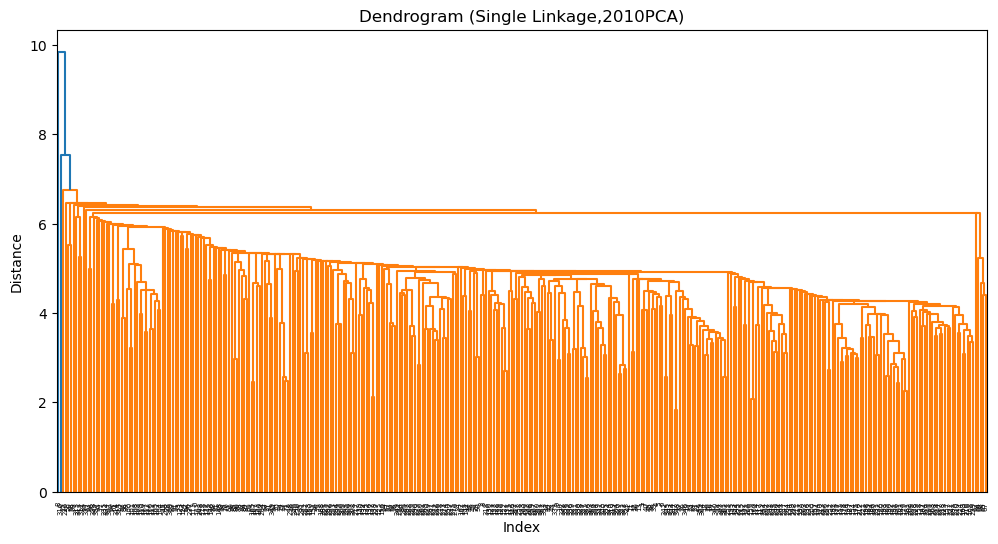

In [65]:
# Perform hierarchical clustering using the 'single' linkage method
distance_single = linkage(reduced, method="single")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.title("Dendrogram (Single Linkage,2010PCA)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

## 02. Complete Linkage Reduced,2010PCA

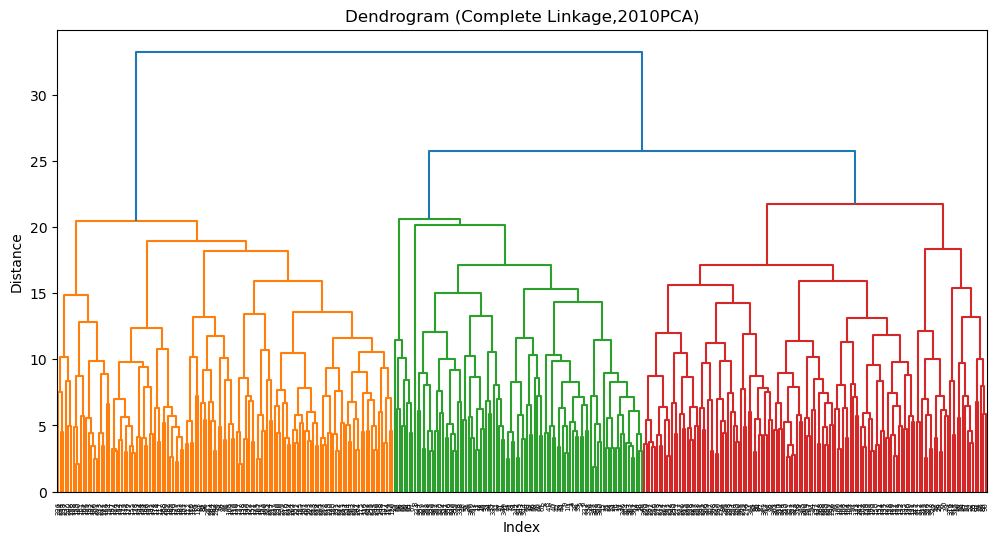

In [66]:
# Perform hierarchical clustering using the 'complete' linkage method
distance_complete = linkage(reduced, method="complete")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_complete, leaf_rotation=90)
plt.title("Dendrogram (Complete Linkage,2010PCA)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

## 3.Average Linkage Reduced,2010PCA

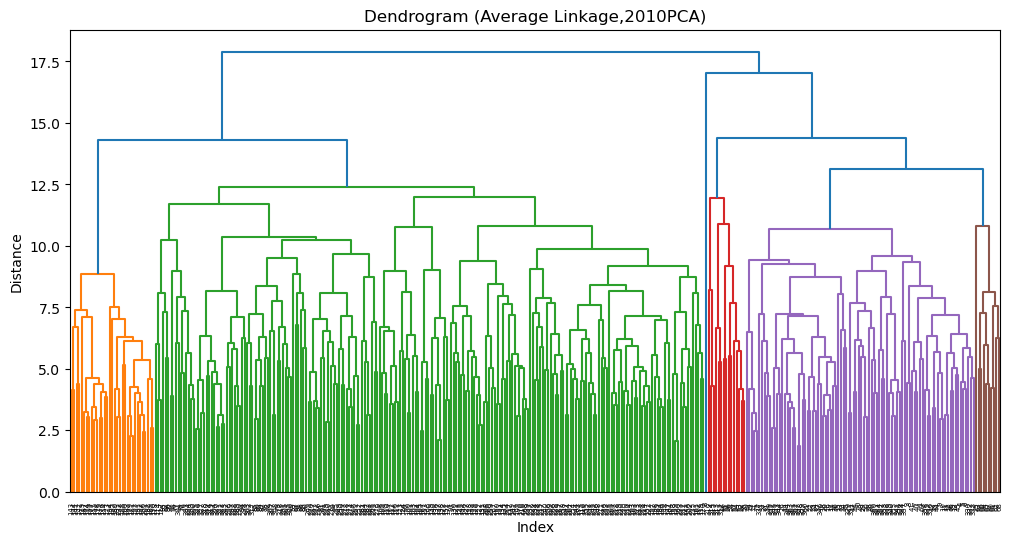

In [67]:
# Perform hierarchical clustering using the 'average' linkage method
distance_average = linkage(reduced, method="average")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_average, leaf_rotation=90)
plt.title("Dendrogram (Average Linkage,2010PCA)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()


## 4. Ward Linkage Reduced,2010 PCA

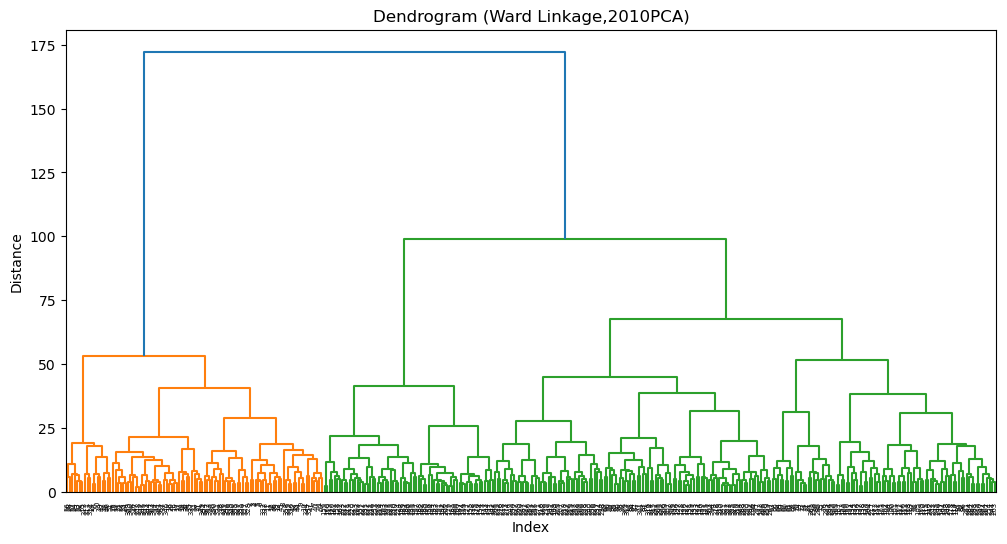

In [68]:
# Perform hierarchical clustering using the 'ward' linkage method
distance_ward = linkage(reduced, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(distance_ward, leaf_rotation=90)
plt.title("Dendrogram (Ward Linkage,2010PCA)")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()